# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

Данный ноутбук посвящен второй части задания. Используется предобученная модель, являющаяся EfficientNet B1. В качестве основного источника вдохновения использовалась статья: <br>
https://arxiv.org/pdf/1912.08136v2.pdf <br>
В целом, просто повторил её результаты. Модель обучалась на сайте kaggle.com с использованием GPU.

In [1]:
# Обновим библиотеки до самых свежих
!pip install torch torchvision torchaudio --upgrade

     |████████████████████████████████| 881.9 MB 14 kB/s s eta 0:00:01   |█▏                              | 33.5 MB 887 kB/s eta 0:15:56     |█▋                              | 45.3 MB 38.8 MB/s eta 0:00:22     |███████████                     | 304.2 MB 67.9 MB/s eta 0:00:09     |███████████                     | 305.7 MB 67.9 MB/s eta 0:00:09     |█████████████████▋              | 484.7 MB 52.9 MB/s eta 0:00:08     |█████████████████▊              | 487.5 MB 52.9 MB/s eta 0:00:08     |████████████████████▊           | 572.3 MB 64.1 MB/s eta 0:00:05     |████████████████████▉           | 573.5 MB 64.1 MB/s eta 0:00:05     |████████████████████▉           | 574.5 MB 8.4 MB/s eta 0:00:37     |████████████████████▉           | 575.5 MB 8.4 MB/s eta 0:00:37     |█████████████████████           | 575.8 MB 8.4 MB/s eta 0:00:37     |███████████████████████         | 635.2 MB 31.9 MB/s eta 0:00:08
     |████████████████████████████████| 23.3 MB 37.8 MB/s eta 0:00:01
     |█████████████████████

In [2]:
import numpy as np
import torch
import torchvision
import tqdm
import sys
import random
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import albumentations
from albumentations.pytorch import ToTensorV2
from tqdm.notebook import tqdm

# Заодно попросим матплотлиб отрисовывать старательно
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [3]:
# Проверим что версия действительно стала свежее
torchvision.__version__

'0.11.1+cu102'

In [4]:
# Код из первого дз для уставки сида
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [5]:
set_random_seed(42)

In [6]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("We will use:", device)
try:
    # Мне просто интересно :)
    print("GPU model:", torch.cuda.get_device_name(0))
except:
    pass

We will use: cuda:0
GPU model: Tesla P100-PCIE-16GB


### Подготовка данных

In [7]:
# В силу особенностей библиотеки albumentations пришлось сделать такой "костыль"
class Transformer:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))["image"]

In [8]:
# В ссылках сверху предлагается ещё изменять сатурацию или оттенки, я так делать не буду, поскольку необходимое качество достигается и без них
train_transform = albumentations.Compose(
    [
        albumentations.Resize(240, 240),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.augmentations.transforms.Normalize(),
        ToTensorV2(),
    ]
)
test_transform = albumentations.Compose(
    [
        albumentations.Resize(240, 240),
        albumentations.augmentations.transforms.Normalize(), 
        ToTensorV2(),
    ]
)

In [9]:
# ВАРНУНГ: При перезапуске кода необходимо поменять path, потому что название датасета конкретно у вас скорее всего другое
train_path = r"../input/hwiad2/dataset/dataset/train"
train_dataset = datasets.ImageFolder(train_path, transform=Transformer(train_transform))
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)
test_path = r"../input/hwiad2/dataset/dataset/val"
test_dataset = datasets.ImageFolder(test_path, transform=Transformer(test_transform))
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=256, shuffle=True, num_workers=2
)

In [10]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

Отдельная функция, которая посчитает акураси. Потом я конечно увидел, как предлагается автором, но и эта функция работает, так что менять не стал.

In [11]:
def train_epoch(
    model,
    data_loader,
    optimizer,
    criterion,
    return_losses=False,
    device="cuda:0",
):
    # Передвинем модель на выбранный ускоритель
    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    y_true = torch.tensor([], device=device)
    y_labels = torch.tensor([], device=device)
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for obj, ans in data_loader:
            # Туда же закинем объекты и ответы
            obj = obj.to(device)
            ans = ans.to(device)
            y_true = torch.cat((y_true, ans), 0)
            predicted = model(obj.float()).squeeze()
            loss = criterion(predicted, ans)
            # Обновим веса
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Обновим инфу
            prbar.set_description(
                f"Current loss: {round(loss.item(), 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            all_losses.append(loss.detach().item())
            y_pred_softmax = torch.log_softmax(predicted, dim=1)
            y_labels = torch.cat((y_labels, y_pred_softmax.argmax(dim=1)), 0)
            num_batches += 1
    y_true = y_true.to("cpu").numpy()
    y_labels = y_labels.to("cpu").numpy()
    metrics = {
        "loss": (total_loss / num_batches),
        "acc": accuracy_score(y_true, y_labels),
    }
    if return_losses:
        return metrics, all_losses
    else:
        return metrics


def test(model, data_loader, criterion, return_losses=False, device="cuda:0"):
    model = model.to(device).eval()
    all_losses = []
    y_true = torch.tensor([], device=device)
    y_labels = torch.tensor([], device=device)
    total_loss = 0
    num_batches = 0
    for obj, ans in data_loader:
        obj = obj.to(device)
        ans = ans.to(device)
        y_true = torch.cat((y_true, ans), 0)
        predicted = model(obj.float()).squeeze()
        loss = criterion(predicted, ans)
        total_loss += loss.item()
        all_losses.append(loss.detach().item())
        y_pred_softmax = torch.log_softmax(predicted, dim=1)
        y_labels = torch.cat((y_labels, y_pred_softmax.argmax(dim=1)), 0)
        num_batches += 1
    y_true = y_true.to("cpu").numpy()
    y_labels = y_labels.to("cpu").numpy()
    metrics = {
        "loss": (total_loss / num_batches),
        "acc": accuracy_score(y_true, y_labels),
    }
    if return_losses:
        return metrics, all_losses
    else:
        return metrics

In [12]:
def fit(
    model,
    epochs,
    train_data_loader,
    test_data_loader,
    optimizer,
    criterion,
    scheduler,
    desired_acc=1.0,
    device="cuda:0",
):
    all_train_losses = []
    epoch_train_losses = []
    epoch_train_accuracy = []
    epoch_test_losses = []
    epoch_test_accuracy = []
    for epoch in range(epochs):
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_epoch(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            return_losses=True,
            criterion=criterion,
            device=device,
        )
        print(
            "Mean loss:",
            round(train_metrics["loss"], 4),
            "Acc:",
            np.round(train_metrics["acc"], 4),
        )
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics["loss"])
        epoch_train_accuracy.append(train_metrics["acc"])
        # Test step
        with torch.no_grad():
            test_metrics = test(
                model=model,
                data_loader=test_data_loader,
                criterion=criterion,
                device=device,
            )
        print(
            "Test mean loss:",
            round(test_metrics["loss"], 4),
            "Test acc:",
            np.round(test_metrics["acc"], 4),
        )
        epoch_test_losses.append(test_metrics["loss"])
        epoch_test_accuracy.append(test_metrics["acc"])
        scheduler.step()
        if test_metrics["acc"] >= desired_acc:
            break
    fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
    ax[0].plot(epoch_train_losses, label="Train")
    ax[0].plot(epoch_test_losses, label="Test")
    ax[0].set_title("Train/test loss evolution")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Mean loss")
    ax[0].grid()
    ax[0].legend()
    ax[1].plot(epoch_train_accuracy, label="Train")
    ax[1].plot(epoch_test_accuracy, label="Test")
    ax[1].set_title("Train/test accuracy evolution")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].grid()
    ax[1].legend()
    plt.show()

In [13]:
def predict(model, data_loader, criterion, device="cuda:0"):
    with torch.no_grad():
        model = model.to(device).eval()
        all_losses = []
        y_true = torch.tensor([], device=device)
        y_labels = torch.tensor([], device=device)
        for obj, ans in data_loader:
            obj = obj.to(device)
            ans = ans.to(device)
            y_true = torch.cat((y_true, ans), 0)
            predicted = model(obj.float()).squeeze()
            loss = criterion(predicted, ans)
            all_losses.append(loss.detach().item())
            y_pred_softmax = torch.log_softmax(predicted, dim=1)
            y_labels = torch.cat((y_labels, y_pred_softmax.argmax(dim=1)), 0)
        y_true = y_true.to("cpu").numpy()
        y_labels = y_labels.to("cpu").numpy()
        return all_losses, y_labels, y_true

### Обучение модели, запуски экспериментов

In [14]:
# Импортим претрейн модельки. Для неё нужен весьма свежий торч, поэтому обновлял
efficientnet_b1 = torchvision.models.efficientnet_b1(pretrained=True)
# Желающие могут посмотреть на сеть до
# display(efficientnet_b1)
# Вспомним что классов у нас 200 штук и заодно прооперируем последний слой:
efficientnet_b1.classifier[1] = nn.Linear(1280, 200)
# Желающие могут посмотреть на итог операции:
# display(efficientnet_b1)

Downloading: "https://download.pytorch.org/models/efficientnet_b1_rwightman-533bc792.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1_rwightman-533bc792.pth


  0%|          | 0.00/30.1M [00:00<?, ?B/s]

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    efficientnet_b1.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9
)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Простой тест на проверку правильности написанного кода

In [16]:
all_losses, predicted_labels, true_labels = predict(
    efficientnet_b1, test_dataloader, criterion, device
)
assert len(predicted_labels) == len(test_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

tests passed


Запустить обучение можно в ячейке ниже.

Train Epoch: 0


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 4.3286 Acc: 0.2931
Test mean loss: 2.7837 Test acc: 0.6214
Train Epoch: 1


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 1.7662 Acc: 0.6601
Test mean loss: 1.141 Test acc: 0.7557
Train Epoch: 2


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 1.1082 Acc: 0.7391
Test mean loss: 0.8529 Test acc: 0.7889
Train Epoch: 3


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.9067 Acc: 0.7747
Test mean loss: 0.7571 Test acc: 0.8107
Train Epoch: 4


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.7865 Acc: 0.8
Test mean loss: 0.7029 Test acc: 0.8192
Train Epoch: 5


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.7053 Acc: 0.8174
Test mean loss: 0.662 Test acc: 0.8255
Train Epoch: 6


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.6406 Acc: 0.8328
Test mean loss: 0.6545 Test acc: 0.8312
Train Epoch: 7


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.5846 Acc: 0.8445
Test mean loss: 0.6295 Test acc: 0.8338
Train Epoch: 8


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.5401 Acc: 0.8559
Test mean loss: 0.6201 Test acc: 0.8383
Train Epoch: 9


  0%|          | 0/1563 [00:00<?, ?it/s]

Mean loss: 0.5 Acc: 0.8651
Test mean loss: 0.6008 Test acc: 0.8403


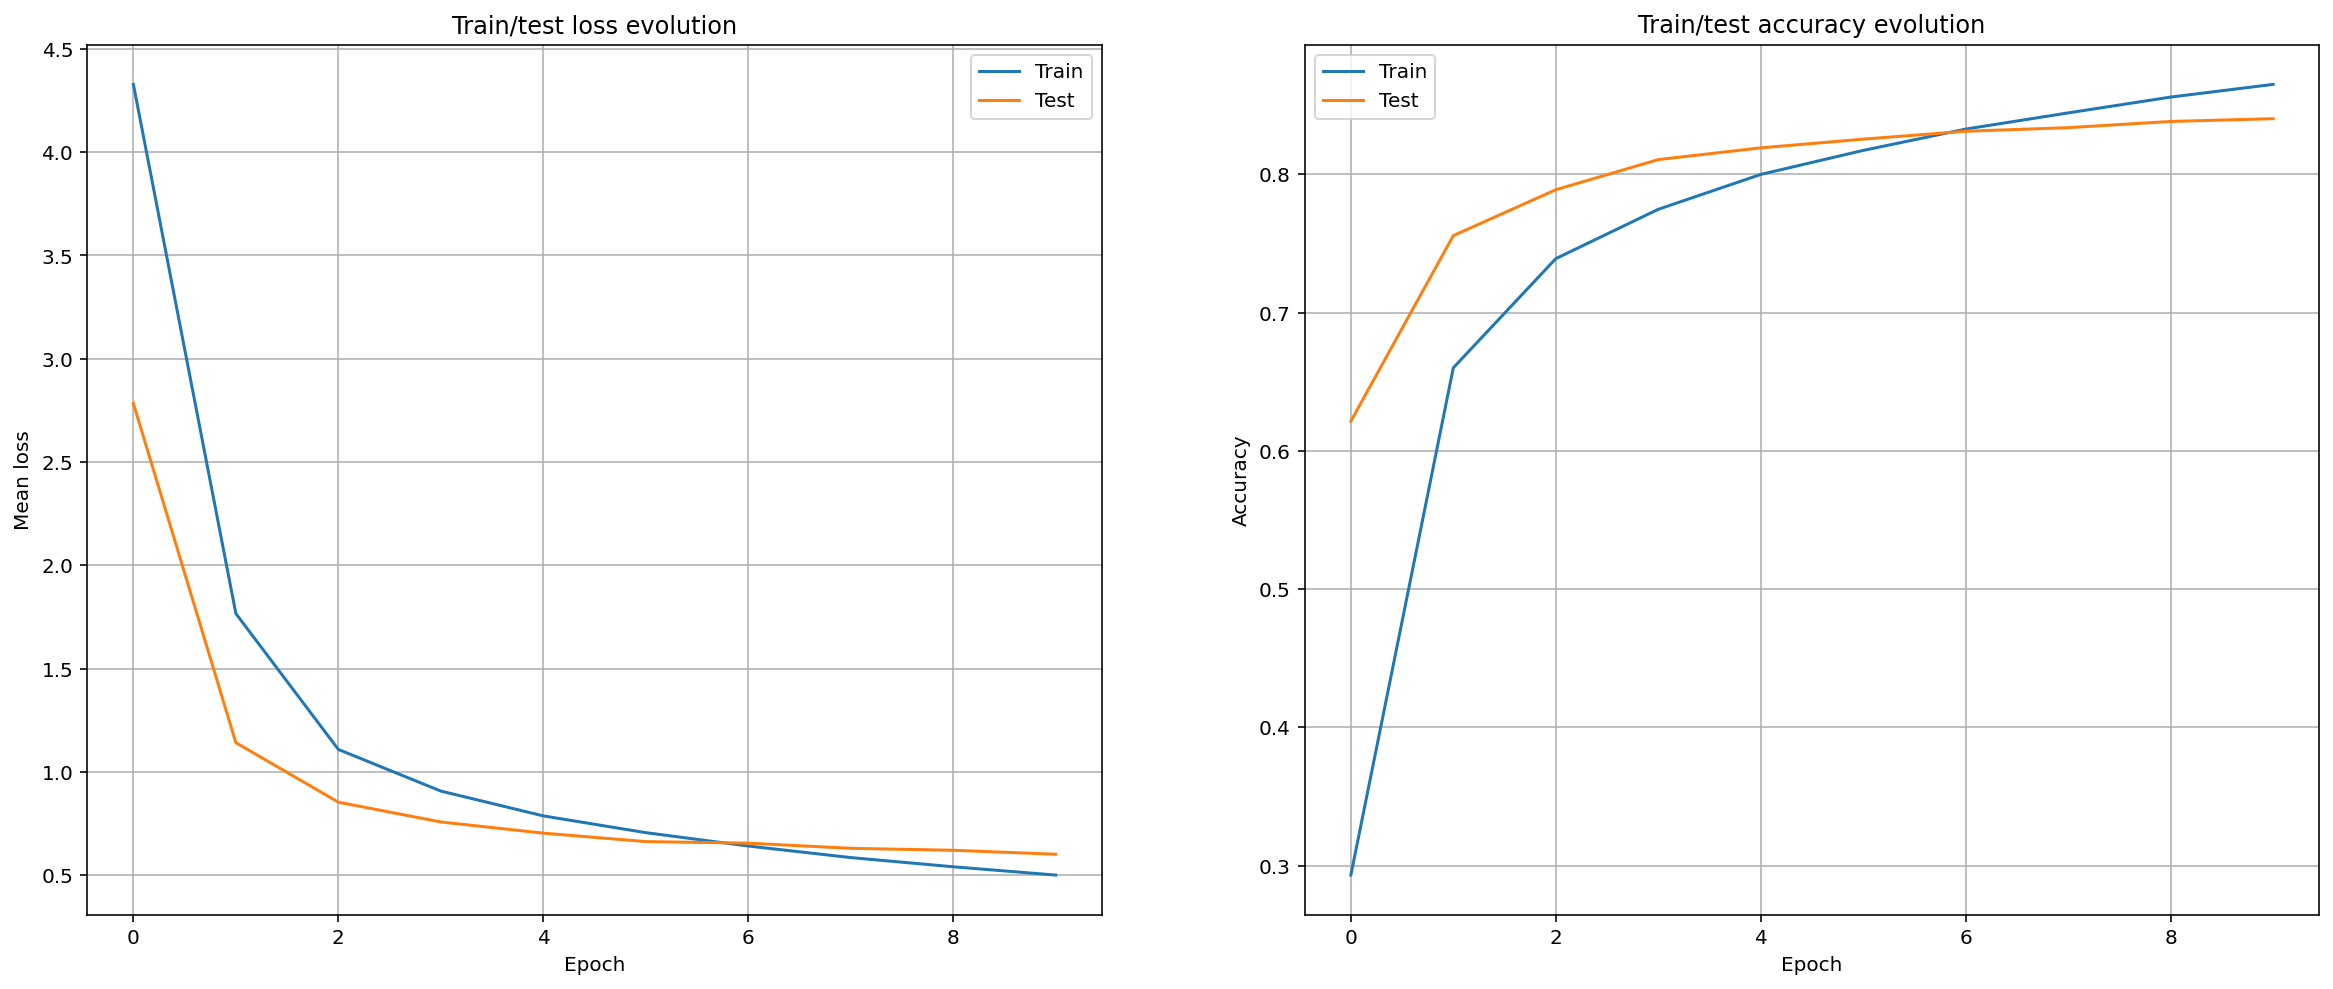

In [17]:
fit(
    efficientnet_b1,
    1000,  # На всякий случай, вдруг desired недостижим
    train_dataloader,
    test_dataloader,
    optimizer,
    criterion,
    scheduler,
    desired_acc=0.84,
    device=device,
)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [18]:
def evaluate(model, data_loader, criterion, device="cuda:0"):
    _, pred, true = predict(model, data_loader, criterion, device)
    return accuracy_score(true, pred)

In [19]:
all_losses, predicted_labels, true_labels = predict(
    efficientnet_b1, test_dataloader, criterion, device
)
assert len(predicted_labels) == len(test_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Оценка за это задание составит {min(10, 10 * (accuracy - 0.5) / 0.3) + int(accuracy * 100) - 80} баллов")

Оценка за это задание составит 14 баллов


Учиывая ещё и достижение 0.44 в первой части, верю в еще 5 бонусных (один балл правда сгорит за превышение мягкого дедлайна) :)

In [20]:
print("Accuracy:", evaluate(efficientnet_b1, test_dataloader, criterion, device))

Accuracy: 0.8403


### Отчёт об экспериментах 

С претрейном идея уйти в гугл показалась ещё более привлекательной, что привело на сайт papers with code, где было несколько статей. В одной из них были предложены новые методы обучения, однако было показано, что даже обычный EfficientNet-B1 в состоянии достичь изначально заявленного порога в задании. Что же, дело в имплементации. Я так думал, но я бы не сдавал после дедлайна, если бы это было просто. Просто 1 в 1 код (well, суть 1 в 1, но сам код другой, потому что там писались скрипты и использовался претрейн не из торчвижн, в торчвижн он очень недавно появился:) ) по не очень понятным мне причинам флуктуировал около 0.838, достигая там 0.8396, но не пересекая заветного порога. Один раз он ночью за 40 с чем-то эпох достиг нужного, но конечно же я скинул скриншот в не флуд в тг и перезапустил ноутбук. Тогда я решил попробовать адам. Та же проблема, что и в прошлой части - слишком быстро переобучались. Тогда я решил добавить новых аугментаций (ColorJitter и VerticalFlip) и попробовать CenterCrop, но это только уменьшило акураси. Так и сгорел мягкий дедлайн. Сегодня же (22 ноября) я решил уйти от ресайза в 224 и попробовать ресайз в 240 (в керасе например, он указан как нужный для этой сети). Убрав всё лишнее и запустив по новой, я очень быстро достиг нужного значения. Хотя у авторов статьи честный ресайз до 224. Опять же, я не исключаю что я что-то недокодил. Тем не менее, итогом стала модель выше.